# VAR Example

In [11]:
# params
TRAIN_START_DATE = '2021-09-02'
TRAIN_END_DATE = '2021-09-21'
TEST_START_DATE = '2021-09-21'
TEST_END_DATE = '2021-09-30'
DATA_TIME_INTERVAL = '5m'
TECHNICAL_INDICATORS_LIST = []
TICKER_LIST = ['BTCUSDT','ETHUSDT']

In [12]:
#load data
from cpl.data.processor_binance import BinanceProcessor
from cpl.data.data_processor import DataProcessor
DP = DataProcessor("binance")

Binance successfully connected


In [18]:
price_array, tech_array, turbulence_array = DP.run(TICKER_LIST, TRAIN_START_DATE
                                                       , TRAIN_END_DATE, DATA_TIME_INTERVAL, 
                                                       TECHNICAL_INDICATORS_LIST, 
                                                       if_vix=False)

Succesfully add technical indicators


In [25]:
price_array[:,1].shape

(4564,)

In [27]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [28]:
model = VAR(price_array)

In [31]:
res = model.fit(3)

In [33]:
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 11, Jan, 2022
Time:                     16:34:18
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.2802
Nobs:                     4561.00    HQIC:                   13.2674
Log likelihood:          -43170.1    FPE:                    574059.
AIC:                      13.2605    Det(Omega_mle):         572301.
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const       154.076712        57.367940            2.686           0.007
L1.y1         1.053190         0.035077           30.025           0.000
L1.y2        -2.173305         0.359372           -6.048           0.000
L2.y1        -0.137648

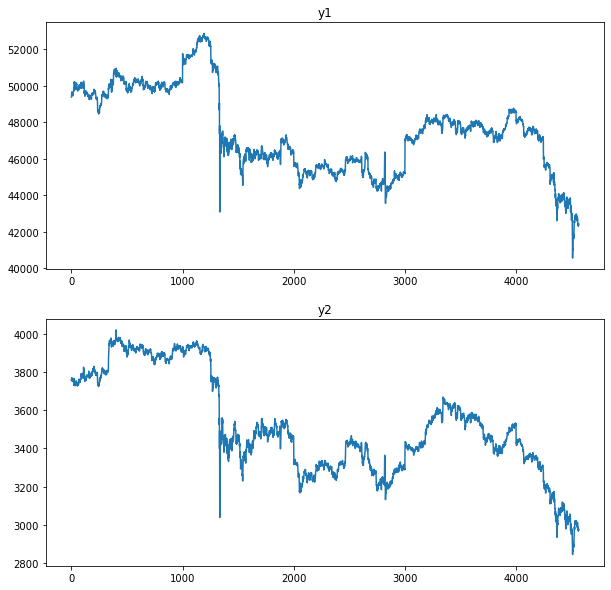

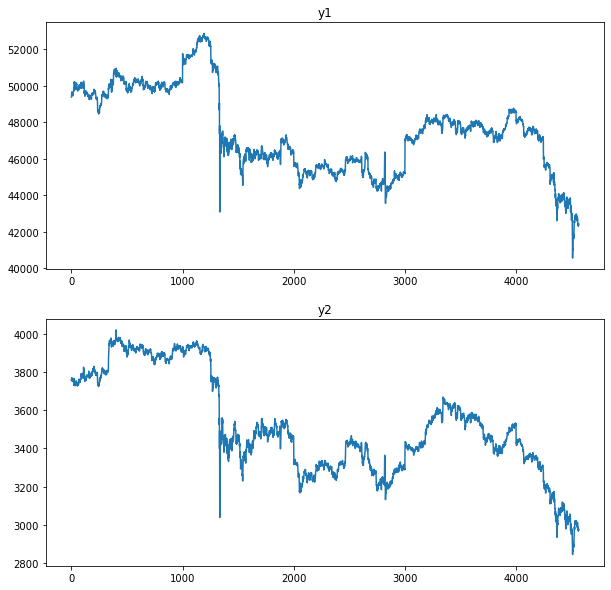

In [32]:
res.plot()